In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [9]:
import concurrent.futures
import os
import pickle
from tqdm import tqdm
DIR_PATH = #"PATH_Your_Repo/BotCatch/data/(Bot)MS4wLjABAAAAKQqZ3XaZ0kAEvANsJCnz4ujRDZdpTNCr8NUnoRbLiFxvzJ7MoXffoqLH_DcdeqNN"
csv_list = os.listdir(DIR_PATH)
print(csv_list[0])
pd.read_csv(os.path.join(DIR_PATH, csv_list[0]), error_bad_lines=False) # secUid not sanitized, some contains ','

MS4wLjABAAAAk66fo-5S9jBXCCPUfjsHcIh4rVeZ4K4nZW2QW8JEx6KEu11uzTVPsOoPFZbXitsF_Following.csv


/var/folders/vw/fhlnd7k958g99z5bj0yg57vh0000gn/T/ipykernel_59905/4236267803.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv(os.path.join(DIR_PATH, csv_list[0]), error_bad_lines=False) # secUid not sanitized, some contains ','
b'Skipping line 62: expected 24 fields, saw 25\n'


,diggCount,followerCount,followingCount,friendCount,heart,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,...,privateAccount,relation,secUid,secret,stitchSetting,ttSeller,uniqueId,verified,start_time,end_time
0,99,4262,1539,0,76,76,5,0,0,0,...,False,0,MS4wLjABAAAAKIdFVXysX3tXSYRjZwTp7kCr3QdYaFHe-m...,False,0,False,..murah,False,1692122261,1692122685
1,519,519,208,0,4865,4865,5,0,3,0,...,False,0,MS4wLjABAAAAgIns9p6lidgcaixvyHl06B-VLTwqYUEoG1...,False,0,False,missvendulka,False,1692122261,1692122685
2,147300,1077,223,0,11300,11300,11,0,0,0,...,False,0,MS4wLjABAAAA1eqLpnOByClh01pxDjEmDZv_gYargd7CEB...,False,0,False,nobideto,False,1692122261,1692122685
3,2,1263,7,0,4,4,1,0,0,0,...,False,0,MS4wLjABAAAAXLorSqWQwDfu_IfQfEBLs6jSPtfZE5rCpN...,False,0,False,damskiee,False,1692122261,1692122685
4,184600,12800,1080,0,74600,74600,348,0,0,0,...,False,0,MS4wLjABAAAAjfbGKNBZbEeJYL7paMD3E8XlSNXp6drQI9...,False,0,False,babycakes_50,False,1692122261,1692122685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,7160,12200,737,0,96500,96500,69,0,0,0,...,False,0,MS4wLjABAAAAnikR308RL5xdX82Zc0UJO2OXn00rdl1wpB...,False,0,False,luluu.93,False,1692119988,1692120061
148,46,26800,55,0,3009,3009,8,0,0,0,...,False,0,MS4wLjABAAAAZnRCkuIV7UdLZjYD4slWVD-6TYOxR8wLgR...,False,0,False,kikibataragangga,False,1692119988,1692120061
149,186,288,4,0,1575,1575,70,0,0,0,...,False,0,MS4wLjABAAAAKkfa_kZ8ESrEByNX1ygJAbNzmX97mWQ2L2...,False,0,False,uav_ua,False,1692119988,1692120061
150,7724,1140,157,0,1544,1544,57,0,0,0,...,False,0,MS4wLjABAAAA537Ch83I_oYEppVG3_uSl9zSaHykS3A50W...,False,0,False,limra97,False,1692119988,1692120061


In [17]:
main_account = [f for f in csv_list if f.endswith("_Follower.csv")]
print(main_account)
df_main = pd.read_csv(os.path.join(DIR_PATH, main_account[0]), on_bad_lines='skip')
df_main

['MS4wLjABAAAAKQqZ3XaZ0kAEvANsJCnz4ujRDZdpTNCr8NUnoRbLiFxvzJ7MoXffoqLH_DcdeqNN_Follower.csv']


,diggCount,followerCount,followingCount,friendCount,heart,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,...,privateAccount,relation,secUid,secret,stitchSetting,ttSeller,uniqueId,verified,start_time,end_time
0,361,5333,138,0,1000,1000,73,0,0,0,...,False,0,MS4wLjABAAAATzw4ZXfGEVJ_xEeseiRDBvNEbYwkD4vk7S...,False,0,False,cbdbizz.com,False,1692265044,1692818422
1,3089,961,2089,0,835,835,19,0,0,0,...,False,0,MS4wLjABAAAAkMY7f-PtdBIAs_UWDhP9zZ2SMWLMdPrRTi...,False,0,False,deborahfauset2,False,1692265044,1692818422
2,38,5,23,0,0,0,0,0,0,0,...,False,0,MS4wLjABAAAA9jBCHZ8tpQnl8rjxXVzd6m4vjjSqwvCpLk...,False,0,False,semii_xueli,False,1692265044,1692818422
3,1373,137,500,0,824,824,138,0,0,0,...,False,0,MS4wLjABAAAA506Vrw9zuIfhXAqBi1jVU1yZJlbpYcM92t...,False,0,False,matthewrobloxfan,False,1692265044,1692818422
4,0,0,1,0,0,0,0,0,0,0,...,False,0,MS4wLjABAAAAAaxDtfi4tguaQ0hOQhtQxVaK3w6C5_A1_9...,False,0,False,lslhy5,False,1692265044,1692818422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,502,0,111,0,0,0,0,0,0,0,...,False,0,MS4wLjABAAAAKB70Ug15DEYAvme2bsHDNU7Wr897KBq2qX...,False,0,False,mckenqotbh7,False,1689463009,1689463019
1526,627,1,109,0,0,0,0,0,0,0,...,False,0,MS4wLjABAAAAuU6_fO18SNi__xESE1wqXF-1YAz1bki6CP...,False,0,False,feilbahx7qf,False,1689463009,1689463019
1527,532,0,42,0,0,0,0,0,0,0,...,False,0,MS4wLjABAAAAV9-NqV_QL4_otb4DW9fjsEWGxiwNbdm5kp...,False,0,False,demonqqmvfn,False,1689463009,1689463019
1528,679,1,108,0,0,0,0,0,0,0,...,False,0,MS4wLjABAAAASSthyp3H3J9laWldifq0jlhvbg19Sic5Hj...,False,0,False,crookjpvktn,False,1689463009,1689463019


Q:
1. start_time, end_time meaning?
2. diggCount?
3. friendCount?
4. commentSetting
5. downloadSetting
6. duetSetting
7. stitchSetting


<AxesSubplot:>

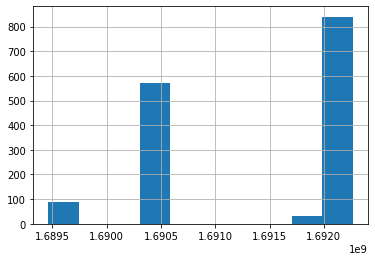

In [88]:
df_main.start_time.hist()

In [19]:
following_list = [f for f in csv_list if f.endswith("_Following.csv")]
def read_csv(csv_name):
    return pd.read_csv(os.path.join(DIR_PATH, csv_name), on_bad_lines="skip")

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(tqdm(executor.map(read_csv, following_list), total=len(following_list)))

100%|██████████| 1398/1398 [00:02<00:00, 540.60it/s]


In [53]:
following_list[12][:-14]

'MS4wLjABAAAA0aMYfYt2QmiVdg6eq3UdE6ItLkKMeWf1AUl8QFdVK4oygL84z6xhd_QZUI1HFRXq'

In [31]:
{"is_main": False, **next(df_main.iterrows())[1].to_dict()}

{'is_main': False,
 'diggCount': 361,
 'followerCount': 5333,
 'followingCount': 138,
 'friendCount': 0,
 'heart': 1000,
 'heartCount': 1000,
 'videoCount': 73,
 'commentSetting': 0,
 'downloadSetting': 0,
 'duetSetting': 0,
 'ftc': False,
 'id': 6591148360543109121,
 'isADVirtual': False,
 'openFavorite': False,
 'privateAccount': False,
 'relation': 0,
 'secUid': 'MS4wLjABAAAATzw4ZXfGEVJ_xEeseiRDBvNEbYwkD4vk7SqT4H_2TS_vaCNzn-dqgXEYN0D_pAQw',
 'secret': False,
 'stitchSetting': 0,
 'ttSeller': False,
 'uniqueId': 'cbdbizz.com',
 'verified': False,
 'start_time': 1692265044,
 'end_time': 1692818422}

In [81]:
def build_graph(main_account, following_list):
    G = nx.DiGraph()
    current_time = 1
    G.add_node(main_account[0][:-13], **{'is_main': True, 'timestamp': 0})
    df_main = pd.read_csv(os.path.join(DIR_PATH, main_account[0]), on_bad_lines='skip')
    with concurrent.futures.ThreadPoolExecutor() as executor:
        def _following_list_dict(path):
            df = pd.read_csv(os.path.join(DIR_PATH, path), on_bad_lines='skip')
            return {'nodeName': path[:-14], 'following_df': df}
        following_list_df_dicts = list(tqdm(executor.map(_following_list_dict, following_list), total=len(following_list), desc="reading csv"))
    # build main account followers
    for _, row in tqdm(df_main.iterrows(), total=len(df_main), desc="building main account followers"):
        G.add_node(row['secUid'], **{'is_main': False, 'timestamp': current_time, **row.to_dict()})
        G.add_edge(row['secUid'], main_account[0][:-13])
        current_time += 1

    # build following list
    max_follower_following_num = max([len(e['following_df']) for e in following_list_df_dicts])
    print(f"max_follower_following_num: {max_follower_following_num}")
    for i in tqdm(range(max_follower_following_num), total=max_follower_following_num, desc="building following list"):
        for df_dict in following_list_df_dicts:
            nodeName = df_dict['nodeName']
            df = df_dict['following_df']
            if i < len(df):
                row = df.iloc[i]
                if row['secUid'] not in G.nodes:
                    G.add_node(row['secUid'], **{'is_main': False, 'timestamp': current_time, **row.to_dict()})
                    
                G.add_edge(nodeName, row['secUid'])
        current_time += 1
    return G

G = build_graph(main_account, following_list)
# graph
#nx.draw(G, with_labels=False, font_weight='bold', node_size=10, width=0.1)
#plt.show()
    


building main account followers: 100%|██████████| 1530/1530 [00:00<00:00, 34275.79it/s]


max_follower_following_num: 1516


building following list: 100%|██████████| 1516/1516 [00:31<00:00, 47.47it/s] 


In [82]:
# max degree
def report_degree_stats(G):
    node_degrees = [G.degree(n) for n in G.nodes]
    print("mean degree: ", np.mean(node_degrees))
    print("median degree: ", np.median(node_degrees))
    print("max degree: ", np.max(node_degrees))
    print("min degree: ", np.min(node_degrees))
    print("25% percentile degree: ", np.percentile(node_degrees, 25))
    print("75% percentile degree: ", np.percentile(node_degrees, 75))
    print("90% percentile degree: ", np.percentile(node_degrees, 90))
    print("95% percentile degree: ", np.percentile(node_degrees, 95))

report_degree_stats(G)

mean degree:  8.28593353255682
median degree:  1.0
max degree:  1530
min degree:  1
25% percentile degree:  1.0
75% percentile degree:  3.0
90% percentile degree:  10.0
95% percentile degree:  22.0


In [78]:
G.number_of_nodes()

160289

In [83]:
def non_one_degree_nodes(G):
    return [n for n in G.nodes if G.degree(n) != 1]

G_sub = G.subgraph(non_one_degree_nodes(G))
G_sub.number_of_nodes()

56511

In [79]:
report_degree_stats(G_sub)

mean degree:  19.82955530781618
median degree:  5.0
max degree:  1504
min degree:  1
25% percentile degree:  3.0
75% percentile degree:  12.0
90% percentile degree:  31.0
95% percentile degree:  48.0


In [74]:
for i, name in enumerate(list(G.nodes())[::-1]):
    if i == 10:
        break
    print(name)
    print(G.nodes[name])

MS4wLjABAAAA32WgUaUt9tIhGXPmuyuW2bXg8VRMVd6YqOrMrXMqe30sYKZoXthRfU3yo_OzTHvn
{'is_main': False, 'timestamp': 3044, 'diggCount': 126, 'followerCount': 1446, 'followingCount': 1324, 'friendCount': 0, 'heart': 171, 'heartCount': 171, 'videoCount': 3, 'commentSetting': 0, 'downloadSetting': 0, 'duetSetting': 0, 'ftc': False, 'id': 6790625850729726981, 'isADVirtual': False, 'openFavorite': False, 'privateAccount': False, 'relation': 0, 'secUid': 'MS4wLjABAAAA32WgUaUt9tIhGXPmuyuW2bXg8VRMVd6YqOrMrXMqe30sYKZoXthRfU3yo_OzTHvn', 'secret': False, 'stitchSetting': 0, 'ttSeller': False, 'uniqueId': 'kkyeisha156', 'verified': False, 'start_time': 1695009760, 'end_time': 1695010606}
MS4wLjABAAAA26giuA1BzEY30r68cnPc6b9kH_p-Z2n3ymtB6IQyd_eWTb4CbxSBGNi8SXgoe-S8
{'is_main': False, 'timestamp': 3043, 'diggCount': 197800, 'followerCount': 1130, 'followingCount': 2191, 'friendCount': 0, 'heart': 42500, 'heartCount': 42500, 'videoCount': 119, 'commentSetting': 0, 'downloadSetting': 3, 'duetSetting': 3, 'ftc'

In [80]:
nx.write_gexf(G_sub, "graph_sub.gexf")

In [75]:
nx.write_gexf(G, "graph.gexf")

In [64]:
nx.write_graphml(G, "graph.graphml")

In [43]:
G.nodes["MS4wLjABAAAATzw4ZXfGEVJ_xEeseiRDBvNEbYwkD4vk7SqT4H_2TS_vaCNzn-dqgXEYN0D_pAQw"]

{'is_main': False,
 'timestamp': 1,
 'diggCount': 361,
 'followerCount': 5333,
 'followingCount': 138,
 'friendCount': 0,
 'heart': 1000,
 'heartCount': 1000,
 'videoCount': 73,
 'commentSetting': 0,
 'downloadSetting': 0,
 'duetSetting': 0,
 'ftc': False,
 'id': 6591148360543109121,
 'isADVirtual': False,
 'openFavorite': False,
 'privateAccount': False,
 'relation': 0,
 'secUid': 'MS4wLjABAAAATzw4ZXfGEVJ_xEeseiRDBvNEbYwkD4vk7SqT4H_2TS_vaCNzn-dqgXEYN0D_pAQw',
 'secret': False,
 'stitchSetting': 0,
 'ttSeller': False,
 'uniqueId': 'cbdbizz.com',
 'verified': False,
 'start_time': 1692265044,
 'end_time': 1692818422}